In [202]:
import numpy
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Open and read file with solar flux data

In [203]:
#open file
doy=250
fname="ssi_"+str(doy)+'_2005.dat'
euv=zeros(190)
euvDAY=zeros(190*1440).reshape(190,1440) # flux in energy
euvPHD=zeros(190*1440).reshape(190,1440) # flux in phot
tmp=zeros(190)

In [204]:
fil=open(fname,"r")
for i in range(3):
       fil.readline()
j=0
while(1):
        try:
            minut=int(fil.readline())
           # print minut
        except:
            break
        euvL=(fil.readline().split())
        for i in range(190):
            euv[i]=float(euvL[i])
        euvDAY[:,j]=euv[:]
        j=j+1
        
fil.close()   

### Solar flux in photon
$E_o=h\nu = hc/\lambda$ - photon energy  
$I=E/{h\nu}$ - photon flux

In [205]:
lam=arange(1,191)
hnu=zeros(190)
h = 6.626e-34 #  Plank constant Joul*s
c=3.e8 # m/s 
hnu[:]=h*c/lam[:]*1.e9

In [206]:
# solar flux in phot
for i in range(1440):
    euvPHD[:,i]=euvDAY[:,i]/hnu[:]*1.e-4*1.e-9 # norm on 10^9 for GSM

In [207]:

massTMP=zeros(3*190).reshape(190,3)
massTMP[:,0]=lam[:]
massTMP[:,1]=euvDAY[:,0]
massTMP[:,2]=euvPHD[:,0]
savetxt("tmpspectr.txt",massTMP,delimiter='  ',fmt='%.6g')

In [208]:
#read new spectr
mSP=loadtxt('spectr.dat',skiprows=3)
N=len(mSP[:,0])
print mSP[:,0],mSP[:,1]

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.
  31.  32.  33.  34.  35.  36.  37.] [   50.     100.     150.     200.     256.32   284.15   250.     303.31
   303.78   300.     368.07   350.     400.     465.22   450.     500.
   554.37   584.33   550.     609.76   629.73   600.     650.     703.36
   700.     765.15   770.41   789.36   750.     800.     850.     900.
   977.02   950.    1025.72  1031.91  1000.  ]


### Standard spectr interval for EUV model (36 intervals)

In [209]:
#low and high boundary intervals in angstrom
lowB=zeros(N+1).astype(int)
highB=zeros(N+1).astype(int)
bon=zeros(N+1)
highB[0]=50
for i in range(1,N+1):
    lowB[i]=int(mSP[i-1,1])
    highB[i]=int(mSP[i-1,2])
print lowB
bon=(lowB+highB)*.5

[   0   50  100  150  200  256  284  250  303  303  300  368  350  400  465
  450  500  554  584  550  609  629  600  650  703  700  765  770  789  750
  800  850  900  977  950 1025 1031 1000]


### Combine two spectral lines (303 A)

In [210]:
lowB[8:-1]=lowB[9:]

print lowB
highB[8:-1]=highB[9:]
# Last line - Laymann alpha
lowB[N]=1210
highB[N]=1210
highB10=zeros(N+1).astype(int)
lowB10=zeros(N+1).astype(int)
for i in range(N+1):
    highB10[i]=int((highB[i])/10.+0.5)
    lowB10[i]=int((lowB[i])/10.+0.5)
highB10[8]=31
lowB10[8]=31
highB10[16]=56
lowB10[16]=56
highB10[26]=78
lowB10[26]=78
highB10[26]=78
lowB10[26]=78
highB10[34]=104
lowB10[34]=104

print highB10
print lowB10

[   0   50  100  150  200  256  284  250  303  300  368  350  400  465  450
  500  554  584  550  609  629  600  650  703  700  765  770  789  750  800
  850  900  977  950 1025 1031 1000 1000]
[  5  10  15  20  25  26  28  30  31  35  37  40  45  47  50  55  56  58
  60  61  63  65  70  70  75  77  78  79  80  85  90  95  98 100 104 103
 105 121]
[  0   5  10  15  20  26  28  25  31  30  37  35  40  47  45  50  56  58
  55  61  63  60  65  70  70  77  78  79  75  80  85  90  98  95 104 103
 100 121]


In [211]:
euvLine=zeros(N+1)
euvLOW=zeros(N+1)
mNAN=zeros(N+1).astype(int)
#cycle for lambda
#search i where lowB=highB
k=0
for i in range(N+1):
    if(lowB10[i]==highB10[i]):
        mNAN[k]=i
        print mNAN[k],highB10[i],euvPHD[lam[highB10[i]-2],0]
        k=k+1
        

5 26 0.77310695241
6 28 1.59311801992
8 31 5.29439078378
10 37 0.946777844854
13 47 0.345654995472
16 56 0.817744239863
17 58 0.139675017607
19 61 0.462793540598
20 63 0.940721400543
23 70 0.156617869001
25 77 0.493539088439
26 78 0.474992453969
27 79 0.614537176778
32 98 3.89367340779
34 104 3.48968709126
35 103 3.60463728745
37 121 7.95648958648


In [212]:
### Fill lines only (if highB=lowB)

In [213]:
k=0
i=int(mNAN[k])
tmp[:]=euvPHD[:,1]
#for kh in range(1,190):
#    #print int((highB[i]))
#    if(int((highB[i])/10.+0.5)==kh):
#        euvLine[i]=euvPHD[kh,0]
#        tmp[kh]=nan
#        k=k+1
#        print i,int((highB[i])/10.+0.5),k,euvDAY[kh,0]
#        i=int(mNAN[k])
#print mNAN
k=0
while(mNAN[k]>0):
#    kh=int((highB[mNAN[k]])/10.+0.45)
    kh=(highB10[mNAN[k]])
    euvLine[mNAN[k]]=euvPHD[kh-2,0]
    tmp[kh-2]=nan
    print euvLine[mNAN[k]],lam[kh-2 ]
    k=k+1
#    print euvLine,highB
euvLine[34]=euvPHD[97,0]   
print euvLine[34]
tmp[97]=nan

0.463602978167 25
0.35318140658 27
1.37722607908 30
0.732713552671 36
0.135847872019 46
0.118311701378 55
0.157396619378 57
0.207165710836 60
0.370477915283 62
0.212866284334 69
0.185863165308 76
0.493539088439 77
0.474992453969 78
0.269475349633 97
3.60463728745 103
0.522315122246 102
2.85239963779 120
3.89367340779


In [226]:
#euvLOW[0]=nansum(tmp[:6])
for kh in range(0,N+1):
    ikb=lowB10[kh]   #int(lowB[kh]/10.+0.45)
    ikh=highB10[kh]  #int((highB[kh])/10.+0.45)
    #print ikb,ikh,'_____'
    if(ikb!=ikh):
        euvLOW[kh]=nansum(tmp[ikb:ikh])
        print ikb,ikh,kh,tmp[ikb:ikh],euvLOW[kh]


0 5 0 [ 0.00681356  0.13857531  0.05872019  0.04039239  0.10270903] 0.347210483952
5 10 1 [ 0.10584968  0.16888671  0.10553979  0.08652279  0.10748063] 0.574279605594
10 15 2 [ 0.0812134   0.07169333  0.04997721  0.0843606   0.05049879] 0.337743334339
15 20 3 [ 0.35251031  0.75737147  2.04901902  1.44034108  0.94572895] 5.54497082201
20 25 4 [ 0.86568216  0.9442137   0.59497082  0.3515243          nan] 2.75639098501
25 30 7 [ 0.79221652         nan  1.59438575  1.88402254         nan] 4.27062481135
30 35 9 [ 5.3023443   1.18629238  0.7175732   1.04155146  0.8795251 ] 9.12728644733
35 40 11 [        nan  0.94687091  0.2944914   0.16648083  0.11896167] 1.52680480934
40 45 12 [ 0.15985009  0.1550818   0.11995352  0.22256766  0.15237247] 0.809825535768
45 50 14 [        nan  0.34617517  0.16824389  0.26045578  0.37330214] 1.14817697958
50 55 15 [ 0.39967703  0.16630164  0.1894994   0.18300724         nan] 0.938485310393
55 60 18 [ 0.82013885         nan  0.14029651  1.07935154         nan]

In [215]:
#for kh in range(N+1):
#    ikb=int(lowB[kh]/10)
#    ikh=int(highB[kh]/10)
#    if(ikb!=ikh):
#        euvLOW[kh]=nansum(tmp[ikb+1:ikh+1])
        #print ikb,ikh,kh,tmp[ikb:ikh],euvLOW[kh]

In [227]:
for i in range(N+1):
    print euvLOW[i], euvLine[i],highB10[i]

0.347210483952 0.0 5
0.574279605594 0.0 10
0.337743334339 0.0 15
5.54497082201 0.0 20
2.75639098501 0.0 25
0.0 0.463602978167 26
0.0 0.35318140658 28
4.27062481135 0.0 30
0.0 1.37722607908 31
9.12728644733 0.0 35
0.0 0.732713552671 37
1.52680480934 0.0 40
0.809825535768 0.0 45
0.0 0.135847872019 47
1.14817697958 0.0 50
0.938485310393 0.0 55
0.0 0.118311701378 56
0.0 0.157396619378 58
2.03978690009 0.0 60
0.0 0.207165710836 61
0.0 0.370477915283 63
2.25602626019 0.0 65
0.477822366435 0.0 70
0.0 0.212866284334 70
0.830449089446 0.0 75
0.0 0.185863165308 77
0.0 0.493539088439 78
0.0 0.474992453969 79
1.04207817688 0.0 80
2.71122728645 0.0 85
5.09665710836 0.0 90
4.6857108361 0.0 95
0.0 0.269475349633 98
1.79112908743 0.0 100
0.0 3.89367340779 104
0.0 0.522315122246 103
4.60177175772 0.0 105
0.0 2.85239963779 121


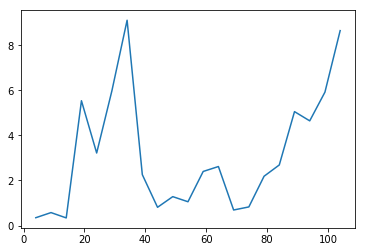

In [217]:
k=0
tmp1=zeros(N+1)
lamTMP=zeros(N+1).astype(int)
for i in range(0,105,5):
    tmp1[k]=sum(euvPHD[i:i+5,0])
    lamTMP[k]=i+4
#print i,euvPHD[i:i+5,1],k
    k=k+1
plot(lamTMP[:21],tmp1[:21])

([<matplotlib.axis.XTick at 0xcd4adf0>,
 <a list of 11 Text xticklabel objects>)

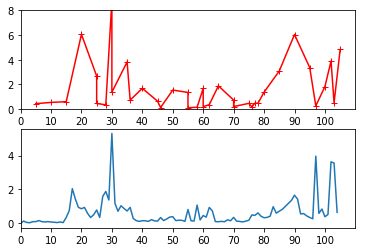

In [218]:
subplot(211)
plot(highB[:-1]/10,euvLOW[:-1]+euvLine[:-1],'+-r')
#plot(euvPHD[:105,1])
xlim([0,110])
ylim([0,8])
xticks(arange(0,110,10))
subplot(212)
plot(euvPHD[:105,1])
xlim([0,110])
xticks(arange(0,110,10))

In [219]:
print sum(euvLOW[:-1]+euvLine[:-1]),sum(euvPHD[:106,1]),sum(tmp1[:])

63.5014787705 67.2792953013 66.2047106349


In [220]:
#i=0
#ik=0
#for kh in range(36):
#    sum=0
#    while ((highB[kh]>i) and (lowB[kh]<=i)):
#        sum=sum+euvDAY[i,60]
#        print highB[kh],i,ik
#        if(highB[kh] != lowB[kh]):
#            i=i+1
#    
#    ik=ik+1


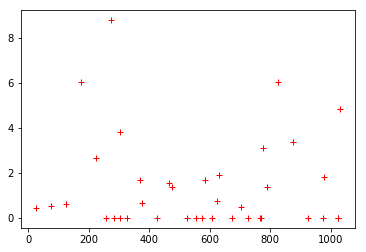

In [221]:
plot (bon,euvLOW,'r+')
#plot(euvDAY[0:105,0]) 

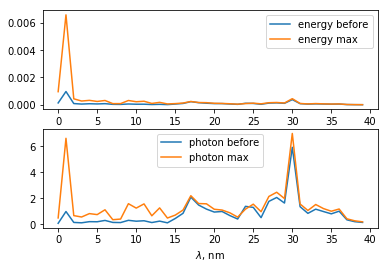

In [222]:
#plot in photon/cm2*s-1*10**9 
#plot(euvPHD[0:105,1160]) 
subplot(211)

plot(euvDAY[0:40,1050],label='energy before')
plot(euvDAY[0:40,1060],label='energy max')
legend()
subplot(212)
plot(euvPHD[0:40,1050],label='photon before')
plot(euvPHD[0:40,1060],label='photon max')
xlabel('$\lambda$, nm')
legend()

In [223]:
sumFLUX=zeros(1440)
sumPHOT=zeros(1440)
for i in range(1440):
    sumFLUX[i]= sum(euvDAY[0:105,i]) 
    sumPHOT[i]= sum(euvPHD[0:105,i])


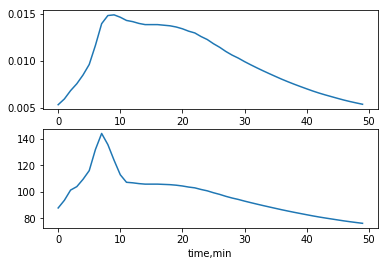

In [224]:
subplot(211)
plot(sumFLUX[1050:1100])
subplot(212)
plot(sumPHOT[1050:1100])
xlabel('time,min')

In [225]:
sum(euvLOW)

53.532830063386662